密度聚类算法可以发现仍和形状的样本簇，而且该算法具有很强的抗噪声能力

执行步骤：

1.为密度聚类算法设置一个合理的半径epsilon以及epsilon领域内所包含的最少样本量MinPts

2.从数据集中随机挑选一个样本点p，检验其再epsilon领域内是否包含指定的最少样本量，如果包含就将其定性为核心对象，并构成一个簇C，
否则重新挑选样本点

3.对于核心对象p所覆盖的其他样本点q，如果点q对应的epsilon邻域内仍然包含最少样本量MinPts，就将其覆盖的样本点统统归于簇C

4.重复步骤3，将最大的密度相连所包含的样本点聚为一类，形成一个大簇

5.完成步骤4后重新回到步骤2，并重复步骤3和4，直到没有新的样本点可以生成新簇时算法结束

cluster.DBSCAN(eps=0.5,min_samples=5,metric='euclidean',metric_params=None,algorithm='auto',leaf_size=30,p=None,n_jobs=1)

# DBSCAN

## 对比kmeans和DBSCAN

In [5]:
#导入第三方模块
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#模拟数据集
X,y = make_blobs(n_samples=2000,centers = [[-1,-2],[1,3]],cluster_std=[0.5,0.5],random_state = 1234)
#将模拟得到的数组转换为数据框用于绘图
plot_data = pd.DataFrame(np.column_stack((X,y)),columns=['x1','x2','y'])
plot_data

,x1,x2,y
0,-0.680184,-2.481014,0.0
1,-1.583760,-1.979578,0.0
2,-0.695611,-2.835042,0.0
3,-1.280046,-1.917523,0.0
4,-1.092983,-2.117915,0.0
...,...,...,...
1995,1.224527,3.224157,1.0
1996,1.496006,2.534983,1.0
1997,1.559967,3.920823,1.0
1998,-1.691930,-1.630276,0.0


D:\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


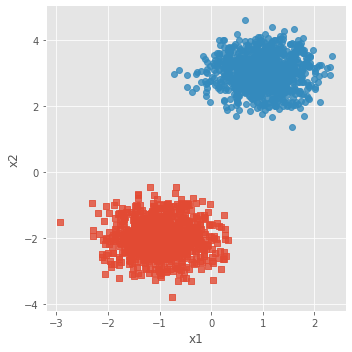

In [8]:
#设置绘图格式
plt.style.use('ggplot')
#绘制散点图
sns.lmplot('x1','x2',data = plot_data,hue = 'y',markers = ['s','o'],fit_reg = False,legend=False)
plt.show()

得到了两个类球型的样本簇，接下来使用DBSCAN和Kmeans两种算法进行聚类，看效果

In [10]:
from sklearn import cluster

#构建Kmeans聚类和密度聚类
kmeans = cluster.KMeans(n_clusters=2,random_state=1234)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=1234)

In [11]:
dbscan = cluster.DBSCAN(eps=0.5,min_samples=10)
dbscan.fit(X)

DBSCAN(min_samples=10)

In [12]:
#将Kmeans聚类和密度聚类的簇标签添加到数据框中
plot_data['kmeans_label'] = kmeans.labels_
plot_data['dbscan_label'] = dbscan.labels_

绘制聚类效果图

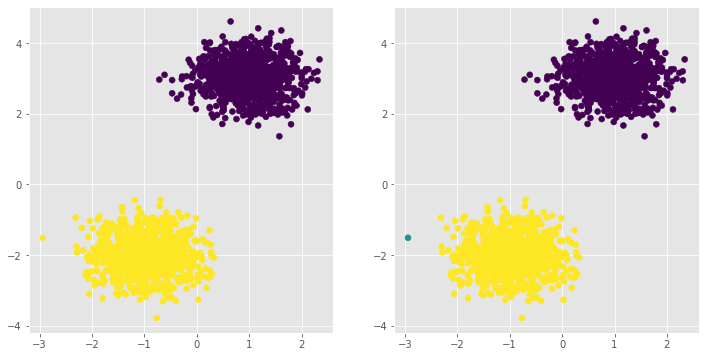

In [14]:
#设置大图框的长和高
plt.figure(figsize=(12,6))
#设置第一个子图的布局
ax1 = plt.subplot2grid(shape = (1,2),loc = (0,0))
#绘制散点图
ax1.scatter(plot_data.x1,plot_data.x2,c=plot_data.kmeans_label)
#设置第二个子图的布局
ax2 = plt.subplot2grid(shape=(1,2),loc = (0,1))
#绘制散点图（为了使kmeans聚类和密度聚类的效果图颜色一致，通过序列的map方法对颜色做重映射）
ax2.scatter(plot_data.x1,plot_data.x2,c=plot_data.dbscan_label.map({-1:1,0:2,1:0}))
plt.show()

可以看到密度聚类发现了一个异常点

## 非球形簇样本点

In [15]:
from sklearn.datasets import make_moons

D:\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


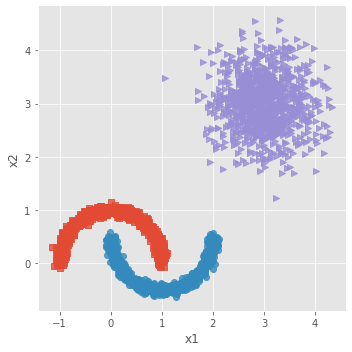

In [18]:
#构造非球形样本点
X1,y1 = make_moons(n_samples=2000,noise=0.05,random_state = 1234)
#构造球形样本点
X2,y2 = make_blobs(n_samples=1000,centers = [[3,3]],cluster_std=0.5,random_state=1234)
#将y2的值替换为2（为了避免与y1的值冲突，因为原始y1和y2中都有0这个值）
y2 = np.where(y2 ==0,2,0)

#将模拟得到的数组转换为数据框，用于绘图
plot_data = pd.DataFrame(np.row_stack([np.column_stack((X1,y1)),np.column_stack((X2,y2))]),columns=['x1','x2','y'])

#绘制散点图（不用补形状代表不同的簇）
sns.lmplot('x1','x2',data = plot_data,hue = 'y',markers = ['s','o','>'],
          fit_reg = False,legend = False)

#显示图形
plt.show()

In [23]:
#构建Kmeans聚类和密度聚类
kmeans = cluster.KMeans(n_clusters=3,random_state=1234)
kmeans.fit(plot_data[['x1','x2']])
dbscan = cluster.DBSCAN(eps=0.3,min_samples=5)
dbscan.fit(plot_data[['x1','x2']])
#将Kmeans聚类和密度聚类的粗表i按添加到数据框中
plot_data['kmeans_label'] = kmeans.labels_
plot_data['dbscan_label'] = dbscan.labels_


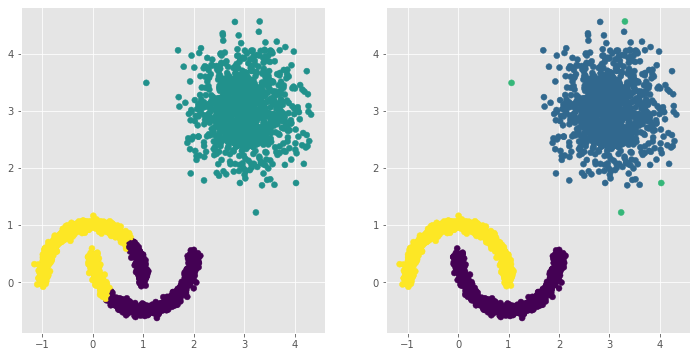

In [25]:
#绘制聚类效果图
#设置大图框的长和高
plt.figure(figsize =(12,6))

#设置第一个子图的布局
ax1 = plt.subplot2grid(shape=(1,2),loc=(0,0))
#绘制散点图
ax1.scatter(plot_data.x1,plot_data.x2,c=plot_data.kmeans_label)
#设置第二个子图的布局
ax2 = plt.subplot2grid(shape=(1,2),loc =(0,1))
#绘制散点图
ax2.scatter(plot_data.x1,plot_data.x2,c= plot_data.dbscan_label.map({-1:2,0:0,1:3,2:1}))
plt.show()

# 层次聚类

凝聚树和分裂树

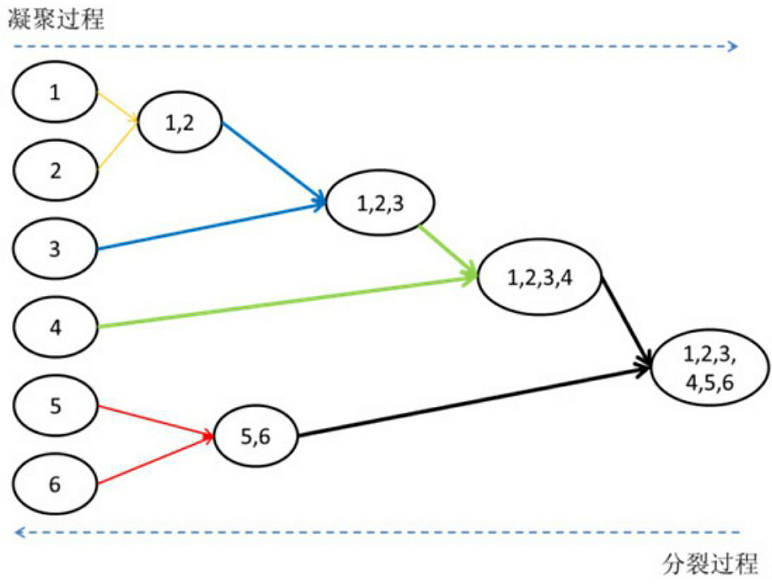

假设有6个样本点需要聚类，既可以使用层次聚类中的凝聚过程，又可以使用分裂过程

两个问题：

1.用什么指标衡量样本点之间的相似性？

answer:样本点之间的欧氏距离或者曼哈顿距离

2.如何衡量簇与簇之间的距离？

在sklearn模块中有三种度量方法，分别是最小距离法，最大距离法，平均距离法

层次聚类步骤：

1.将数据集中的每个样本点当作一个类别

2.计算所有样本点之间的两两距离，并从中挑选出最小距离的两个点构成一个簇

3.继续计算剩余样本点之间的两两距离和点与簇之间的距离，然后将最小距离的点或簇合并到一起

4.重复步骤2和3，直到满足聚类的个数或其他设定的条件，便结束算法运行

## 三种层次聚类的比较

cluster.AgglomerativeClustering(n_clusters=2,affinity = 'euclidean',memory=None,connnectivity=None,compute_full_tree='auto',linkage='ward')

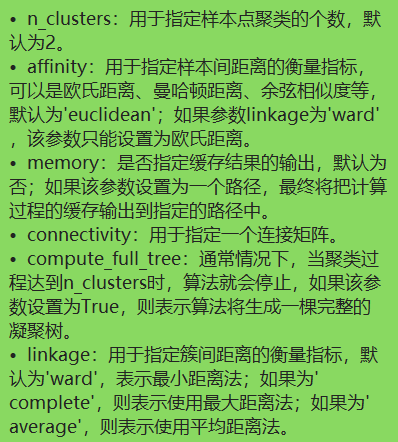


层次聚类法对于球形簇有更好的聚类效果，比较三种簇间的距离指标所形成的聚类差异

D:\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


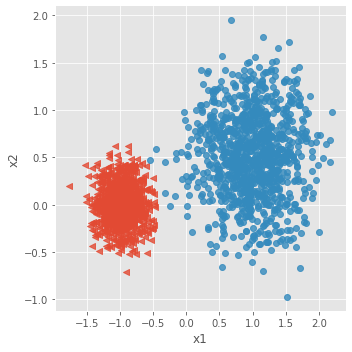

In [27]:
#构造两个球形簇的数据样本点
X,y = make_blobs(n_samples = 2000,centers = [[-1,0],[1,0.5]],cluster_std=[0.2,0.45],random_state=1234)
#将模拟得到的数组转换为数据框用于绘图
plot_data = pd.DataFrame(np.column_stack((X,y)),columns=['x1','x2','y'])
#绘制散点图（用不同的形状代表不同的簇）
sns.lmplot('x1','x2',data = plot_data,hue = 'y',markers = ['<','o'],
          fit_reg = False,legend = False)
plt.show()

下面使用层次聚类法对生成好的随机样本点进行聚类

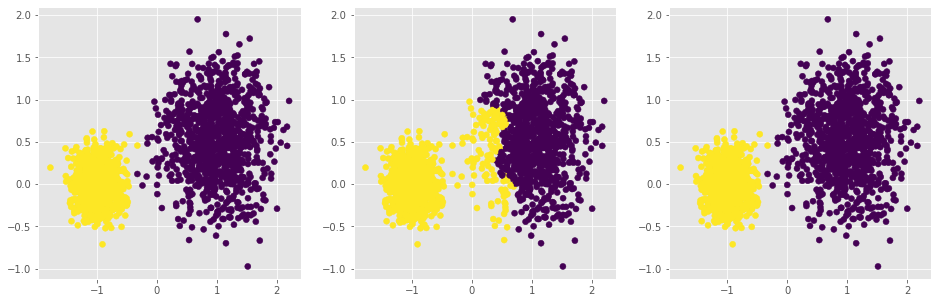

In [29]:
#设置大图框的长和高
plt.figure(figsize=(16,5))

#设置第一个子图的布局
ax1 = plt.subplot2grid(shape=(1,3),loc=(0,0))

#层次聚类--最小距离法
agnes_min = cluster.AgglomerativeClustering(n_clusters = 2,linkage='ward')
agnes_min.fit(X)

#绘制聚类效果图
ax1.scatter(X[:,0],X[:,1],c = agnes_min.labels_)

#设置第二个子图的布局
ax2 = plt.subplot2grid(shape=(1,3),loc=(0,1))

#层次聚类--最大距离法
agnes_max = cluster.AgglomerativeClustering(n_clusters = 2,linkage='complete')
agnes_max.fit(X)

#绘制聚类效果图
ax2.scatter(X[:,0],X[:,1],c = agnes_max.labels_)

#设置第三个子图的布局
ax3 = plt.subplot2grid(shape=(1,3),loc = (0,2))

#层次聚类--平均距离法
agnes_avg = cluster.AgglomerativeClustering(n_clusters = 2,linkage = 'average')
agnes_avg.fit(X)

#绘制聚类效果图
ax3.scatter(X[:,0],X[:,1],c = agnes_avg.labels_)

中间的最大距离法不是很有效，最小距离法和平均距离法做出来的基本一样

# 密度聚类和层次聚类的应用

In [30]:
import pandas as pd
Province = pd.read_excel('Province.xlsx')

In [31]:
Province.head()

,Province,Birth_Rate,Death_Rate
0,北京市,9.32,5.20
1,天津市,7.37,5.54
2,河北省,12.42,6.36
3,山西省,10.29,5.52
4,内蒙古自治区,9.03,5.69


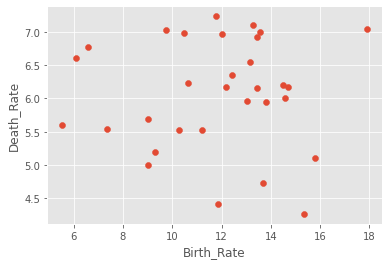

In [33]:
#绘制一下出生率和死亡率的散点图大概看一下数据分布
import matplotlib.pyplot as plt
plt.scatter(Province.Birth_Rate,Province.Death_Rate)

#添加标签
plt.xlabel("Birth_Rate")
plt.ylabel("Death_Rate")
plt.show()

利用密度聚类对该数据集进行验证

In [40]:
from sklearn import preprocessing

#选取建模的变量
predictors = ['Birth_Rate','Death_Rate']
#变量的标准化处理
X = preprocessing.scale(Province[predictors])
X = pd.DataFrame(X)

#构建空列表用于保存不同参数组合下的结果
res = []
#迭代不同的eps值
for eps in np.arange(0.001,1,0.05):
    #迭代不同的min_samples值
    for min_samples in range(2,10):
        dbscan = cluster.DBSCAN(eps = eps,min_samples = min_samples)
        #模型拟合
        dbscan.fit(X)
        #统计各参数组合下的聚类个数（-1表示异常点）
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        #异常点的个数
        outliners = np.sum(np.where(dbscan.labels_ == -1,1,0))
        #统计每个簇的样本个数
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})
#将迭代后的结果存储到数据框中
df = pd.DataFrame(res)

C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_35092\243182208.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_35092\243182208.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_35092\243182208.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
C:\Users\Jay Shen\AppData\Local\Temp\ipykernel

C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_35092\243182208.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_35092\243182208.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
C:\Users\Jay Shen\AppData\Local\Temp\ipykernel_35092\243182208.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
C:\Users\Jay Shen\AppData\Local\Temp\ipykernel

In [41]:
df

,eps,min_samples,n_clusters,outliners,stats
0,0.001,2,0,31,[]
1,0.001,3,0,31,[]
2,0.001,4,0,31,[]
3,0.001,5,0,31,[]
4,0.001,6,0,31,[]
...,...,...,...,...,...
155,0.951,5,1,7,[24]
156,0.951,6,1,8,[23]
157,0.951,7,1,8,[23]
158,0.951,8,1,11,[20]


In [42]:
df.loc[df.n_clusters ==3,:]

,eps,min_samples,n_clusters,outliners,stats
40,0.251,2,3,23,[3 3 2]
57,0.351,3,3,19,[6 3 3]
88,0.551,2,3,7,[17 5 2]
96,0.601,2,3,7,[17 5 2]
104,0.651,2,3,5,[17 7 2]
112,0.701,2,3,5,[17 7 2]
129,0.801,3,3,4,[17 7 3]
136,0.851,2,3,2,[24 3 2]
144,0.901,2,3,1,[24 4 2]
152,0.951,2,3,1,[24 4 2]


这个看起来比较合理

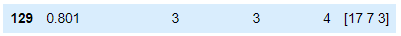

根据以上的参数组合构造密度聚类模型

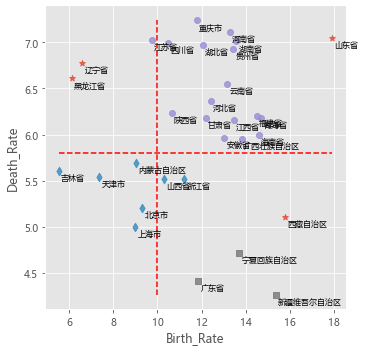

<Figure size 720x720 with 0 Axes>

In [53]:
#利用上述的参数组合值，重建密度聚类算法
dbscan = cluster.DBSCAN(eps=0.801,min_samples = 3)
#模型拟合
dbscan.fit(X)
Province['dbscan_label'] = dbscan.labels_

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

#绘制聚类的效果散点图
sns.lmplot(x = 'Birth_Rate',y = 'Death_Rate',hue = 'dbscan_label',data = Province,markers = ['*','d',"o",'s'],fit_reg=False,legend=False)

#添加省份标签
for x,y,text in zip(Province.Birth_Rate,Province.Death_Rate,Province.Province):
    plt.text(x+0.1,y-0.1,text,size = 8)
    
#添加参考线
plt.hlines(y=5.8,xmin=Province.Birth_Rate.min(),xmax=Province.Birth_Rate.max(),linestyles = '--',colors = 'red')
plt.vlines(x=10,ymin = Province.Death_Rate.min(),ymax = Province.Death_Rate.max(),linestyles = '--',colors = 'red')

#添加轴标签
plt.xlabel("Birth_Rate")
plt.ylabel("Death_Rate")
plt.figure(figsize = (10,10))

plt.show()

再使用层次聚类算法对该数据集进行聚类，比较其与密度聚类之间的差异

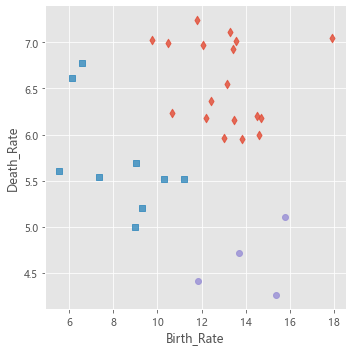

In [54]:
#利用最小距离法构建层次聚类
agnes_min = cluster.AgglomerativeClustering(n_clusters = 3,linkage='ward')

#模型拟合
agnes_min.fit(X)
Province['agnes_label'] = agnes_min.labels_

#绘制层次聚类的效果散点图
sns.lmplot(x = 'Birth_Rate',y = 'Death_Rate',hue = 'agnes_label',data = Province,markers = ['d','s','o'],fit_reg = False,legend=False)

#添加轴标签
plt.xlabel('Birth_Rate')
plt.ylabel('Death_Rate')

plt.show()

利用Kmeans算法对该数据集进行聚类，聚类之前利用轮廓系数法判断合理的聚类个数